In [22]:
import os
os.chdir(r'C:\Users\63094\Downloads\hero wired\datacsv')
os.listdir()
df=pd.read_csv('Dataset (4).csv')
df

<IPython.core.display.Javascript object>

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [23]:
df1=df.rename(columns={'int.rate':'interestrate','log.annual.inc':'annual income','dti':'debts/income','fico':'creditscore','revolbal':'amount unpaid at end','delinq.2yrs':'due','pub.rec':'public_record', 'not.fully.paid':'target','inq.last.6mths':'enquiry'})


In [24]:
df1_encoded=pd.get_dummies(df1,columns=['purpose'],drop_first=True)
df1_encoded

<IPython.core.display.Javascript object>

,credit.policy,interestrate,installment,annual income,debts/income,creditscore,days.with.cr.line,revol.bal,revol.util,enquiry,due,public_record,target,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [25]:
x=df1_encoded.drop('target',axis=1)
y=df1_encoded['target']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

<IPython.core.display.Javascript object>

In [27]:
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,confusion_matrix,cohen_kappa_score,roc_auc_score,roc_curve
 

### general model

In [28]:
model_gen_g=tree.DecisionTreeClassifier( criterion='gini',random_state=42)
model_gen_g.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
def compare_model_train_test(model_gen_g):
    y_train_pred = model_gen_g.predict(X_train)
    y_test_pred = model_gen_g.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_clf_report = classification_report(y_train, y_train_pred)
    test_clf_report = classification_report(y_test, y_test_pred)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
         'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n' )

In [30]:
 compare_model_train_test(model_gen_g)

Training accuracy is : 1.0 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5619
           1       1.00      1.00      1.00      1085

    accuracy                           1.00      6704
   macro avg       1.00      1.00      1.00      6704
weighted avg       1.00      1.00      1.00      6704
 
 Testing accuracy is : 0.74 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      2426
           1       0.22      0.25      0.23       448

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.76      0.74      0.75      2874
 



In [31]:
def evaluate_preds(y_test, y_test_pred):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}") 

    return metric_dict

### train

In [32]:
y_train_pred = model_gen_g.predict(X_train)
cm=confusion_matrix(y_train,y_train_pred)
cm

array([[5619,    0],
       [   0, 1085]], dtype=int64)

<IPython.core.display.Javascript object>

<AxesSubplot:>

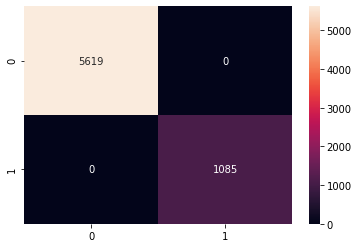

In [33]:
sns.heatmap(cm,annot=True, fmt='g')

### test

In [34]:
y_test_pred = model_gen_g.predict(X_test)
model_gen = evaluate_preds(y_test, y_test_pred)

Acc: 74.39%
Precision: 0.22
Recall: 0.25
F1 score: 0.23


In [35]:
cm=confusion_matrix(y_test,y_test_pred)
cm

array([[2026,  400],
       [ 336,  112]], dtype=int64)

<IPython.core.display.Javascript object>

<AxesSubplot:>

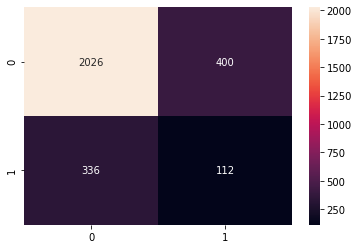

In [36]:
sns.heatmap(cm,annot=True, fmt='g')

In [37]:
y_pred_rcv=model_gen_g.predict_proba(X_test)
y_pred_rcv_pos=y_pred_rcv[:,1]##taking positive probabilities
y_pred_rcv_pos
fpr,tpr,thresholds =roc_curve(y_test,y_pred_rcv_pos)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

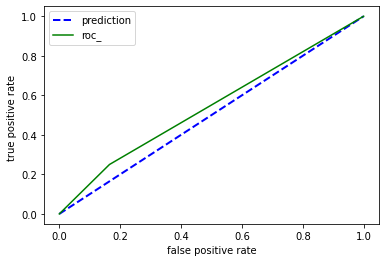

In [38]:
fpr,tpr,thresholds =roc_curve(y_test,y_pred_rcv_pos)
plt.plot([0,1],[0,1],color='blue',label='prediction',linewidth=2,linestyle='--')
plt.xlabel('false positive rate')
plt.plot(fpr,tpr ,color='green',label='roc_')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate ')
plt.legend()
plt.show()

In [39]:
from sklearn.model_selection import cross_val_score
cross_val_score(model_gen_g,x,y, cv=5)

array([0.74008351, 0.73643006, 0.75365344, 0.73629243, 0.27101828])

### over sampling or under sampling

### smote

In [40]:
from imblearn.over_sampling import SMOTE
os=SMOTE(sampling_strategy='minority')

In [41]:
x.shape

(9578, 18)

In [42]:
y.shape

(9578,)

In [43]:
x_sm,y_sm=os.fit_resample(x,y)

In [44]:
x_sm.shape

(16090, 18)

In [45]:
y_sm.value_counts()

0    8045
1    8045
Name: target, dtype: int64

In [46]:
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(x_sm,y_sm,test_size=0.3,random_state=42)

<IPython.core.display.Javascript object>

In [47]:
y_test_sm.value_counts()

0    2444
1    2383
Name: target, dtype: int64

In [48]:
y_train_sm.value_counts()

1    5662
0    5601
Name: target, dtype: int64

### now these are to be balanced

In [49]:
model_s=tree.DecisionTreeClassifier(criterion='gini',random_state=42)

In [50]:
model_s.fit(X_train_sm,y_train_sm)

DecisionTreeClassifier(random_state=42)

In [139]:
 cross_val_score(model_s,x,y, cv=5)

array([0.74008351, 0.73643006, 0.75365344, 0.73629243, 0.27101828])

In [51]:
def compare_model_train_test(model_s):
    y_train_pred = model_s.predict(X_train_sm)
    y_test_pred = model_s.predict(X_test_sm)
    train_accuracy = accuracy_score(y_train_sm, y_train_pred)
    test_accuracy = accuracy_score(y_test_sm, y_test_pred)
    train_clf_report = classification_report(y_train_sm, y_train_pred)
    test_clf_report = classification_report(y_test_sm, y_test_pred)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
         'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n' )

In [52]:
compare_model_train_test(model_s)

Training accuracy is : 1.0 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5601
           1       1.00      1.00      1.00      5662

    accuracy                           1.00     11263
   macro avg       1.00      1.00      1.00     11263
weighted avg       1.00      1.00      1.00     11263
 
 Testing accuracy is : 0.77 
               precision    recall  f1-score   support

           0       0.78      0.75      0.76      2444
           1       0.75      0.79      0.77      2383

    accuracy                           0.77      4827
   macro avg       0.77      0.77      0.77      4827
weighted avg       0.77      0.77      0.77      4827
 



In [53]:
pip install InformationValue

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement InformationValue
ERROR: No matching distribution found for InformationValue


### train

In [54]:
y_pred_s_train=model_s.predict(X_train_sm)
model_sm = evaluate_preds(y_train_sm, y_pred_s_train)

Acc: 100.00%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


In [55]:
cm_train_sm=confusion_matrix(y_pred_s_train,y_pred_s_train)
cm_train_sm

array([[5601,    0],
       [   0, 5662]], dtype=int64)

<IPython.core.display.Javascript object>

<AxesSubplot:>

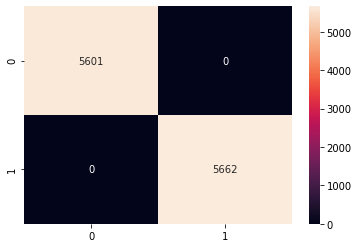

In [56]:
sns.heatmap(cm_train_sm,annot=True, fmt='g')

### test

In [57]:
y_pred_s=model_s.predict(X_test_sm)
model_sm = evaluate_preds(y_test_sm, y_pred_s)

Acc: 76.76%
Precision: 0.75
Recall: 0.79
F1 score: 0.77


In [58]:
cm_test_sm=confusion_matrix(y_test_sm,y_pred_s)
cm_test_sm

array([[1823,  621],
       [ 501, 1882]], dtype=int64)

<IPython.core.display.Javascript object>

<AxesSubplot:>

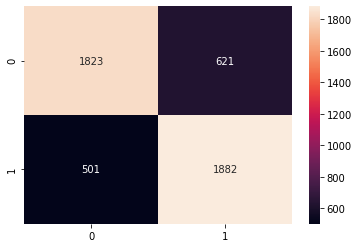

In [59]:
sns.heatmap(cm_test_sm,annot=True, fmt='g')

In [60]:
def evaluate_preds(y_test, y_test_pred):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}") 

    return metric_dict

In [61]:
y_pred_rcv=model_s.predict_proba(X_test_sm)
y_pred_rcv_pos=y_pred_rcv[:,1]##taking positive probabilities
y_pred_rcv_pos
fpr,tpr,thresholds =roc_curve(y_test_sm,y_pred_rcv_pos)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

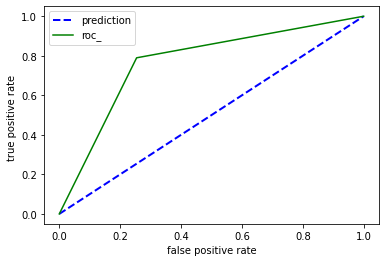

In [62]:
fpr,tpr,thresholds =roc_curve(y_test_sm,y_pred_rcv_pos)
plt.plot([0,1],[0,1],color='blue',label='prediction',linewidth=2,linestyle='--')
plt.xlabel('false positive rate')
plt.plot(fpr,tpr ,color='green',label='roc_')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate ')
plt.legend()
plt.show()

In [63]:
roc_auc_score(y_test_sm,y_pred_s)

0.7678345763396344

### over sampling using the random oversampler

In [64]:
from imblearn import over_sampling,under_sampling
from imblearn.over_sampling import RandomOverSampler

In [65]:
ros=RandomOverSampler( sampling_strategy='minority')
x_ros,y_ros=ros.fit_resample(x,y)

In [66]:
X_train_ros,X_test_ros,y_train_ros,y_test_ros=train_test_split(x_ros,y_ros,test_size=0.3,random_state=42)

<IPython.core.display.Javascript object>

In [67]:
y_test_ros.value_counts()

0    2444
1    2383
Name: target, dtype: int64

In [68]:
y_train_ros.value_counts()

1    5662
0    5601
Name: target, dtype: int64

In [69]:
model_ros_s=tree.DecisionTreeClassifier(criterion='gini',random_state=42)

In [70]:
model_ros_s.fit(X_train_ros,y_train_ros)

DecisionTreeClassifier(random_state=42)

In [71]:
def compare_model_train_test(model_ros):
    y_train_pred = model_ros_s.predict(X_train_ros)
    y_test_pred = model_ros_s.predict(X_test_ros)
    train_accuracy = accuracy_score(y_train_ros, y_train_pred)
    test_accuracy = accuracy_score(y_test_ros, y_test_pred)
    train_clf_report = classification_report(y_train_ros, y_train_pred)
    test_clf_report = classification_report(y_test_ros, y_test_pred)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
         'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n' )

In [72]:
compare_model_train_test(model_ros_s)

Training accuracy is : 1.0 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5601
           1       1.00      1.00      1.00      5662

    accuracy                           1.00     11263
   macro avg       1.00      1.00      1.00     11263
weighted avg       1.00      1.00      1.00     11263
 
 Testing accuracy is : 0.89 
               precision    recall  f1-score   support

           0       0.98      0.80      0.88      2444
           1       0.83      0.99      0.90      2383

    accuracy                           0.89      4827
   macro avg       0.90      0.89      0.89      4827
weighted avg       0.90      0.89      0.89      4827
 



### train

In [73]:
y_pred_s_train_ros=model_ros_s.predict(X_train_ros)
cm_train_ros=confusion_matrix(y_pred_s_train_ros,y_pred_s_train_ros)
cm_train_ros

array([[5601,    0],
       [   0, 5662]], dtype=int64)

<IPython.core.display.Javascript object>

<AxesSubplot:>

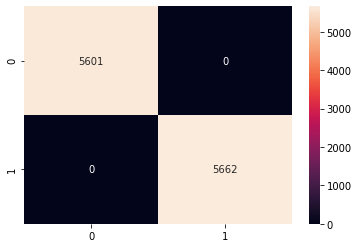

In [74]:
 sns.heatmap(cm_train_ros,annot=True, fmt='g')

### test

In [75]:
y_pred_s_test_ros=model_ros_s.predict(X_test_ros)
cm_test_ros=confusion_matrix(y_test_ros,y_pred_s_test_ros)
cm_test_ros

array([[1946,  498],
       [  35, 2348]], dtype=int64)

<IPython.core.display.Javascript object>

<AxesSubplot:>

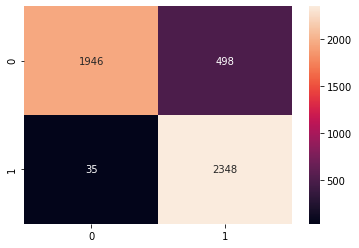

In [76]:
sns.heatmap(cm_test_ros,annot=True, fmt='g')

In [77]:
y_pred_ros=model_ros_s.predict(X_test_ros)

In [78]:
def evaluate_preds(y_test, y_test_pred):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}") 

    return metric_dict

In [79]:

model_ros = evaluate_preds(y_test_ros, y_pred_ros)

Acc: 88.96%
Precision: 0.83
Recall: 0.99
F1 score: 0.90


In [80]:
y_pred_rcv=model_ros_s.predict_proba(X_test_ros)
y_pred_rcv_pos=y_pred_rcv[:,1]##taking positive probabilities
y_pred_rcv_pos
fpr,tpr,thresholds =roc_curve(y_test_ros,y_pred_rcv_pos)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

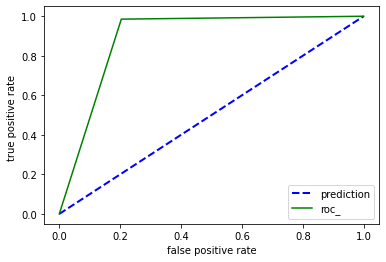

In [81]:
fpr,tpr,thresholds =roc_curve(y_test_ros,y_pred_rcv_pos)
plt.plot([0,1],[0,1],color='blue',label='prediction',linewidth=2,linestyle='--')
plt.xlabel('false positive rate')
plt.plot(fpr,tpr ,color='green',label='roc_')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate ')
plt.legend()
plt.show()

In [82]:
roc_auc_score(y_test_ros,y_pred_rcv_pos)

0.8907741551758124

In [140]:
cross_val_score(model_ros_s,x,y, cv=5)

array([0.74008351, 0.73643006, 0.75365344, 0.73629243, 0.27101828])

### post-PRUNING(on oversampling data)............

In [83]:
model=tree.DecisionTreeClassifier(ccp_alpha=0.0,random_state=42)
###its defualt is o for giving better alpha our model should be increased
###firstly we take best alpha value
path=model.cost_complexity_pruning_path(X_train_ros,y_train_ros)
path
ccp_alphas=path.ccp_alphas
print(len(ccp_alphas))
ccp_alphas;

727


In [84]:
l=[]
for k in ccp_alphas:
    model_p=tree.DecisionTreeClassifier(ccp_alpha=k,random_state=42)
    model_p.fit(X_train_ros,y_train_ros)
    l.append(model_p)### we are taking alpha for every in decision tree

In [85]:
test_scores=[model_p.score(X_test_ros,y_test_ros) for model_p in l]
test_scores;

In [86]:
train_scores=[model_p.score(X_train_ros,y_train_ros) for model_p in l]
train_scores;

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

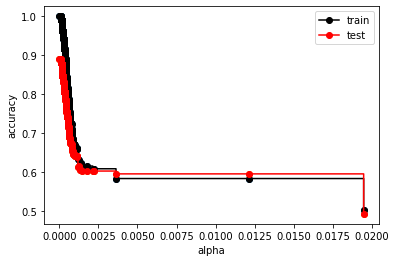

In [87]:
plt.scatter(ccp_alphas,train_scores)
plt.scatter(ccp_alphas,test_scores)
plt.plot(ccp_alphas,train_scores,color='black',marker='o',label='train',drawstyle='steps-post')
plt.plot(ccp_alphas,test_scores,color='red',marker='o',label='test',drawstyle='steps-post')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()
plt.subplots
plt.show()

In [88]:
after_p=tree.DecisionTreeClassifier(ccp_alpha=0.0001)
after_p.fit(X_train_ros,y_train_ros)

DecisionTreeClassifier(ccp_alpha=0.0001)

In [89]:
def compare_model_train_test(model):
    y_train_pred = after_p.predict(X_train_ros)
    y_test_pred = after_p.predict(X_test_ros)
    train_accuracy = accuracy_score(y_train_ros, y_train_pred)
    test_accuracy = accuracy_score(y_test_ros, y_test_pred)
    train_clf_report = classification_report(y_train_ros, y_train_pred)
    test_clf_report = classification_report(y_test_ros, y_test_pred)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
         'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n' )

In [90]:
compare_model_train_test(model)

Training accuracy is : 0.9942288910592204 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      5601
           1       0.99      1.00      0.99      5662

    accuracy                           0.99     11263
   macro avg       0.99      0.99      0.99     11263
weighted avg       0.99      0.99      0.99     11263
 
 Testing accuracy is : 0.88 
               precision    recall  f1-score   support

           0       0.97      0.79      0.87      2444
           1       0.82      0.97      0.89      2383

    accuracy                           0.88      4827
   macro avg       0.89      0.88      0.88      4827
weighted avg       0.90      0.88      0.88      4827
 



In [91]:
from sklearn.model_selection import cross_val_score     ##for logistic regression
score=cross_val_score(after_p,X_test_ros,y_test_ros,cv=10)
score

array([0.75362319, 0.76397516, 0.73291925, 0.76190476, 0.76604555,
       0.75776398, 0.7184265 , 0.7593361 , 0.7966805 , 0.76556017])

### train

In [92]:
y_pred_s_train_ros=after_p.predict(X_train_ros)
cm_train_p=confusion_matrix(y_train_ros,y_pred_s_train_ros)
cm_train_p

array([[5551,   50],
       [  15, 5647]], dtype=int64)

<IPython.core.display.Javascript object>

<AxesSubplot:>

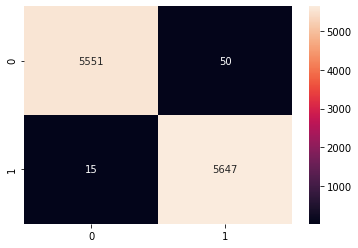

In [93]:
sns.heatmap(cm_train_p,annot=True, fmt='g')

### test

In [94]:
y_pred_p=after_p.predict(X_test_ros) 
y_pred_p_test=after_p.predict(X_test_ros)
cm_test_p=confusion_matrix(y_test_ros,y_pred_p)
cm_test_p

array([[1931,  513],
       [  60, 2323]], dtype=int64)

<IPython.core.display.Javascript object>

<AxesSubplot:>

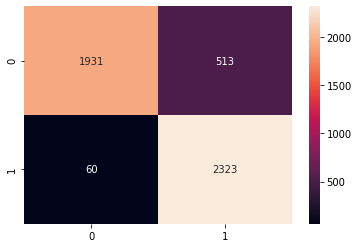

In [95]:
sns.heatmap(cm_test_p,annot=True, fmt='g')

In [96]:
y_pred_p=after_p.predict(X_test_ros)

In [97]:
print(classification_report(y_train_ros,y_pred_s_train_ros))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5601
           1       0.99      1.00      0.99      5662

    accuracy                           0.99     11263
   macro avg       0.99      0.99      0.99     11263
weighted avg       0.99      0.99      0.99     11263



In [98]:
print(classification_report(y_test_ros,y_pred_s_test_ros))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      2444
           1       0.83      0.99      0.90      2383

    accuracy                           0.89      4827
   macro avg       0.90      0.89      0.89      4827
weighted avg       0.90      0.89      0.89      4827



In [99]:
y_pred_rcv=after_p.predict_proba(X_test_ros)
y_pred_rcv_pos=y_pred_rcv[:,1]##taking positive probabilities
y_pred_rcv_pos
fpr,tpr,thresholds =roc_curve(y_test_ros,y_pred_rcv_pos)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

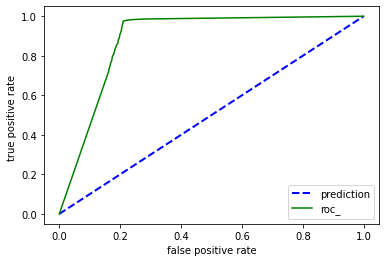

In [100]:

plt.plot([0,1],[0,1],color='blue',label='prediction',linewidth=2,linestyle='--')
plt.xlabel('false positive rate')
plt.plot(fpr,tpr ,color='green',label='roc_')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate ')
plt.legend()
plt.show()

In [101]:
roc_auc_score(y_test_ros,y_pred_p)

0.8824599265253812

### post-pruning(on normal data)

In [102]:
model=tree.DecisionTreeClassifier(ccp_alpha=0.0,random_state=42)
###its defualt is o for giving better alpha our model should be increased
###firstly we take best alpha value
path=model.cost_complexity_pruning_path(X_train,y_train)
path
ccp_alphas=path.ccp_alphas
print(len(ccp_alphas))
ccp_alphas;

411


In [103]:
l=[]
for k in ccp_alphas:
    model_p=tree.DecisionTreeClassifier(ccp_alpha=k,random_state=42)
    model_p.fit(X_train,y_train)
    l.append(model_p)### we are taking alpha for every in decision tree

In [104]:
test_scores=[model_p.score(X_test,y_test) for model_p in l]
test_scores;

In [105]:
train_scores=[model_p.score(X_train,y_train) for model_p in l]
train_scores;

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

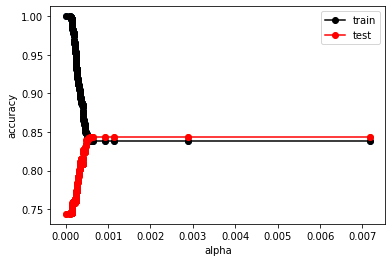

In [106]:
plt.scatter(ccp_alphas,train_scores)
plt.scatter(ccp_alphas,test_scores)
plt.plot(ccp_alphas,train_scores,color='black',marker='o',label='train',drawstyle='steps-post')
plt.plot(ccp_alphas,test_scores,color='red',marker='o',label='test',drawstyle='steps-post')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()
plt.subplots
plt.show()

In [107]:
after_p_n=tree.DecisionTreeClassifier(ccp_alpha=0.0002)
after_p_n.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0002)

In [108]:
def compare_model_train_test(model):
    y_train_pred = after_p_n.predict(X_train)
    y_test_pred = after_p_n.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_clf_report = classification_report(y_train, y_train_pred)
    test_clf_report = classification_report(y_test, y_test_pred)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
         'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n' )

In [109]:
compare_model_train_test(model)

Training accuracy is : 0.9683770883054893 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5619
           1       0.96      0.84      0.90      1085

    accuracy                           0.97      6704
   macro avg       0.97      0.92      0.94      6704
weighted avg       0.97      0.97      0.97      6704
 
 Testing accuracy is : 0.76 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      2426
           1       0.22      0.22      0.22       448

    accuracy                           0.76      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.76      0.76      0.76      2874
 



In [110]:
y_pred_p=after_p_n.predict(X_test)
def evaluate_preds(y_test_ros, y_test_pred):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}") 

    return metric_dict
 

In [111]:
model_p = evaluate_preds(y_test_ros, y_pred_p)

Acc: 75.89%
Precision: 0.22
Recall: 0.22
F1 score: 0.22


In [112]:
a=after_p_n.predict(X_test_ros)

In [113]:
y_pred_rcv=after_p_n.predict_proba(X_test_ros)
y_pred_rcv_pos=y_pred_rcv[:,1]##taking positive probabilities
y_pred_rcv_pos
fpr,tpr,thresholds =roc_curve(y_test_ros,y_pred_rcv_pos)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

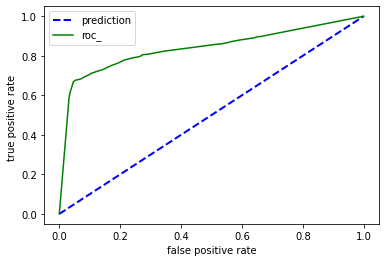

In [114]:
plt.plot([0,1],[0,1],color='blue',label='prediction',linewidth=2,linestyle='--')
plt.xlabel('false positive rate')
plt.plot(fpr,tpr ,color='green',label='roc_')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate ')
plt.legend()
plt.show()

In [115]:
roc_auc_score(y_test_ros,a)

0.8049980494679649

In [141]:
cross_val_score(after_p_n,x,y, cv=5)

array([0.77296451, 0.76461378, 0.78392484, 0.75822454, 0.27624021])

### pruning(on over sampling)

In [116]:
from sklearn.model_selection import GridSearchCV
model_grid=tree.DecisionTreeClassifier(random_state=42 )
grid={'max_depth':range(1,40)}
gs=GridSearchCV(model_grid,grid,cv=5) 

In [117]:
 gs.fit(X_train_ros,y_train_ros)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(1, 40)})

In [118]:
gs.best_params_

{'max_depth': 34}

In [119]:
model_grid_best=tree.DecisionTreeClassifier(ccp_alpha=0.00125,max_depth=30,criterion='gini')
model_grid_best.fit(X_train_ros,y_train_ros)

DecisionTreeClassifier(ccp_alpha=0.00125, max_depth=30)

In [120]:
model_grid_best=tree.DecisionTreeClassifier(ccp_alpha=0.00125,max_depth=30,criterion='gini')
model_grid_best.fit(X_train_ros,y_train_ros)

DecisionTreeClassifier(ccp_alpha=0.00125, max_depth=30)

In [121]:
def compare_model_train_test(model_grid_best):
    y_train_pred = model_grid_best.predict(X_train_ros)
    y_test_pred = model_grid_best.predict(X_test_ros)
    train_accuracy = accuracy_score(y_train_ros, y_train_pred)
    test_accuracy = accuracy_score(y_test_ros, y_test_pred)
    train_clf_report = classification_report(y_train_ros, y_train_pred)
    test_clf_report = classification_report(y_test_ros, y_test_pred)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
         'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n' )

In [122]:
compare_model_train_test(model_grid_best)

Training accuracy is : 0.6352659149427329 
               precision    recall  f1-score   support

           0       0.67      0.52      0.59      5601
           1       0.61      0.75      0.67      5662

    accuracy                           0.64     11263
   macro avg       0.64      0.63      0.63     11263
weighted avg       0.64      0.64      0.63     11263
 
 Testing accuracy is : 0.61 
               precision    recall  f1-score   support

           0       0.66      0.50      0.57      2444
           1       0.59      0.73      0.65      2383

    accuracy                           0.61      4827
   macro avg       0.62      0.62      0.61      4827
weighted avg       0.62      0.61      0.61      4827
 



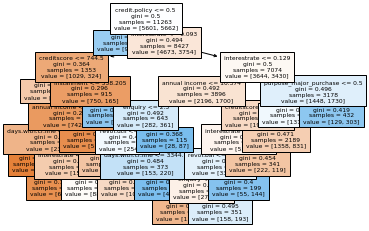

In [123]:
tree.plot_tree(model_grid_best,filled=True,feature_names=df1_encoded.columns,fontsize=6);
 

In [124]:
y_pred_train_p=model_grid_best.predict(X_train_ros)
cm_train_grid=confusion_matrix(y_train_ros,y_pred_train_p)
cm_train_grid

array([[2927, 2674],
       [1434, 4228]], dtype=int64)

<IPython.core.display.Javascript object>

<AxesSubplot:>

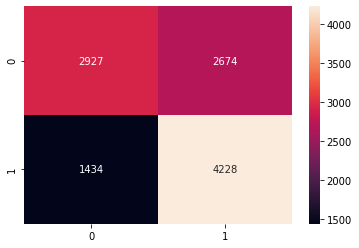

In [125]:
sns.heatmap(cm_train_grid,annot=True, fmt='g')

In [126]:
y_pred_test_p=model_grid_best.predict(X_test_ros)
cm_train_grid_test=confusion_matrix(y_test_ros,y_pred_test_p)
cm_train_grid_test

array([[1228, 1216],
       [ 643, 1740]], dtype=int64)

<IPython.core.display.Javascript object>

<AxesSubplot:>

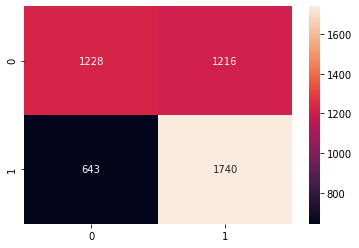

In [127]:
sns.heatmap(cm_train_grid_test,annot=True, fmt='g')

In [128]:
y_pred_rcv=model_grid_best.predict_proba(X_test_ros)
y_pred_rcv_pos=y_pred_rcv[:,1]##taking positive probabilities
y_pred_rcv_pos
fpr,tpr,thresholds =roc_curve(y_test_ros,y_pred_rcv_pos)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

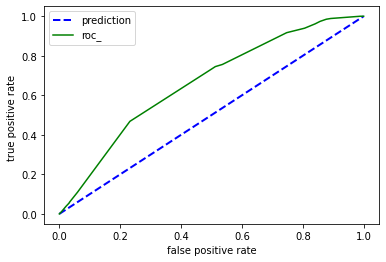

In [129]:
plt.plot([0,1],[0,1],color='blue',label='prediction',linewidth=2,linestyle='--')
plt.xlabel('false positive rate')
plt.plot(fpr,tpr ,color='green',label='roc_')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate ')
plt.legend()
plt.show()

In [130]:
roc_auc_score(y_test_ros,y_pred_test_p)

0.6163135219259718

In [143]:
 cross_val_score(model_grid_best,x,y, cv=10)

array([0.84029228, 0.84029228, 0.84029228, 0.84029228, 0.84029228,
       0.83924843, 0.83924843, 0.83924843, 0.84012539, 0.84012539])

### pruning on normal data

In [131]:
from sklearn.model_selection import GridSearchCV
model_grid=tree.DecisionTreeClassifier(random_state=42)
grid={'max_depth':range(1,40)}
gs=GridSearchCV(model_grid,grid,cv=5) 

In [132]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(1, 40)})

In [133]:
gs.best_params_

{'max_depth': 1}

In [134]:
model_grid_best=tree.DecisionTreeClassifier(ccp_alpha=0.00125,max_depth=1, min_samples_leaf=2,min_samples_split=4,criterion='gini')
model_grid_best.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.00125, max_depth=1, min_samples_leaf=2,
                       min_samples_split=4)

In [135]:
model_grid_best_n=tree.DecisionTreeClassifier(ccp_alpha=0.00125,max_depth=1, min_samples_leaf=2,min_samples_split=4,criterion='gini')
model_grid_best_n.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.00125, max_depth=1, min_samples_leaf=2,
                       min_samples_split=4)

In [136]:
def compare_model_train_test(model_grid_best_n):
    y_train_pred = model_grid_best_n.predict(X_train)
    y_test_pred = model_grid_best_n.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_clf_report = classification_report(y_train, y_train_pred)
    test_clf_report = classification_report(y_test, y_test_pred)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
         'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n' )

In [137]:
compare_model_train_test(model_grid_best_n)

Training accuracy is : 0.8381563245823389 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      5619
           1       0.00      0.00      0.00      1085

    accuracy                           0.84      6704
   macro avg       0.42      0.50      0.46      6704
weighted avg       0.70      0.84      0.76      6704
 
 Testing accuracy is : 0.84 
               precision    recall  f1-score   support

           0       0.84      1.00      0.92      2426
           1       0.00      0.00      0.00       448

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.71      0.84      0.77      2874
 



C:\Users\63094\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\63094\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\63094\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\63094\anaconda3\lib\site-packages\sklearn\metr

In [138]:
analyse = df1.groupby(['installment','target'])['target'].count()
analyse = interestrate.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
analyse
 

NameError: name 'interestrate' is not defined

In [ ]:
 df1

In [ ]:
x=df1['interestrate']
y=df1['target']